In [1]:
# Import all necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=(14,6)
sns.set_style('darkgrid')

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


## Most successful team

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

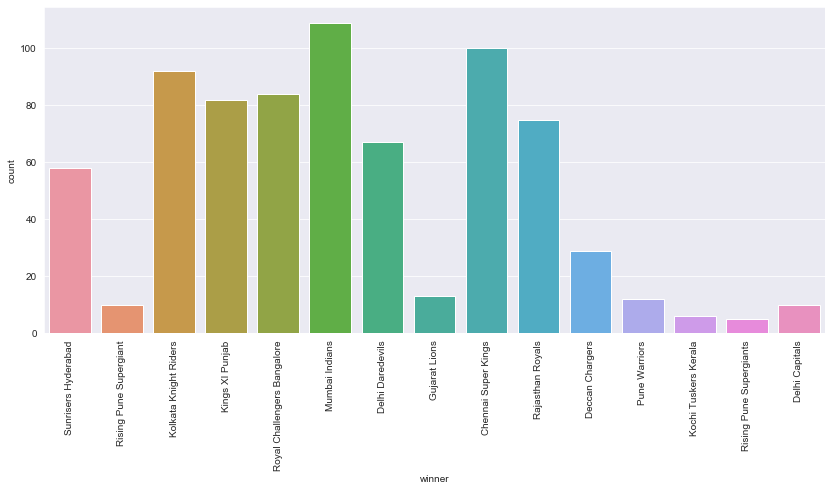

In [6]:
sns.countplot(matches['winner'])
plt.xticks(rotation=90)

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Most successful batsman

In [9]:
batsman_df = deliveries.groupby(['match_id', 'inning','batsman','batting_team'])
batsman = batsman_df['batsman_runs'].sum().reset_index()
batsman = matches[['id','season']].merge(batsman, left_on = 'id', right_on = 'match_id',how = 'left').drop('id',axis=1)

In [10]:
batsman.head()

,season,match_id,inning,batsman,batting_team,batsman_runs
0,2017,1,1,BCJ Cutting,Sunrisers Hyderabad,16
1,2017,1,1,DA Warner,Sunrisers Hyderabad,14
2,2017,1,1,DJ Hooda,Sunrisers Hyderabad,16
3,2017,1,1,MC Henriques,Sunrisers Hyderabad,52
4,2017,1,1,S Dhawan,Sunrisers Hyderabad,40


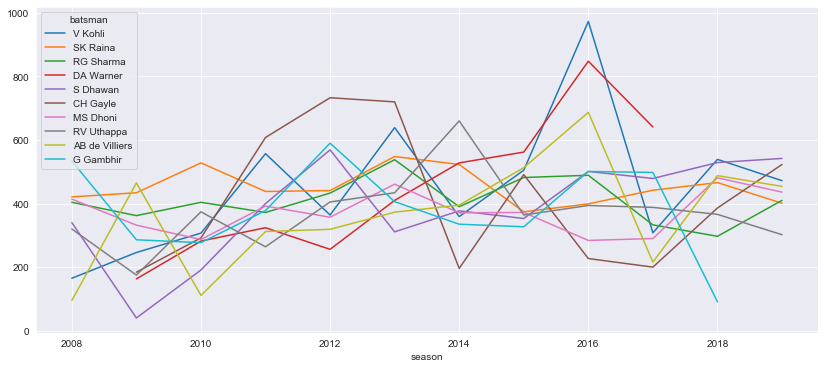

In [11]:
batsman_runsperseason = batsman.groupby(['season','batsman','batting_team'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason.head()
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1)
batsman_runsperseason.head()
batsman_runsperseason = batsman_runsperseason.sort_values(by='Total',ascending=False).drop('Total',axis=1)
ax =  batsman_runsperseason[:10].T.plot()

## Factors contributing win or loss

In [12]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## Toss winner affect on actual winners

In [13]:
toss_winner = matches.groupby(['season','toss_winner']).winner.value_counts().reset_index(name='count')
toss_winner['result'] = np.where(toss_winner.toss_winner == toss_winner.winner,'win','loss')
toss_result = toss_winner.groupby(['season','toss_winner','result'])['count'].sum().reset_index()

[Text(0, 0, 'Chennai Super Kings'),
 Text(0, 0, 'Chennai Super Kings'),
 Text(0, 0, 'Deccan Chargers'),
 Text(0, 0, 'Deccan Chargers'),
 Text(0, 0, 'Delhi Daredevils'),
 Text(0, 0, 'Delhi Daredevils'),
 Text(0, 0, 'Kings XI Punjab'),
 Text(0, 0, 'Kings XI Punjab'),
 Text(0, 0, 'Kolkata Knight Riders'),
 Text(0, 0, 'Kolkata Knight Riders'),
 Text(0, 0, 'Mumbai Indians'),
 Text(0, 0, 'Mumbai Indians'),
 Text(0, 0, 'Rajasthan Royals'),
 Text(0, 0, 'Rajasthan Royals'),
 Text(0, 0, 'Royal Challengers Bangalore')]

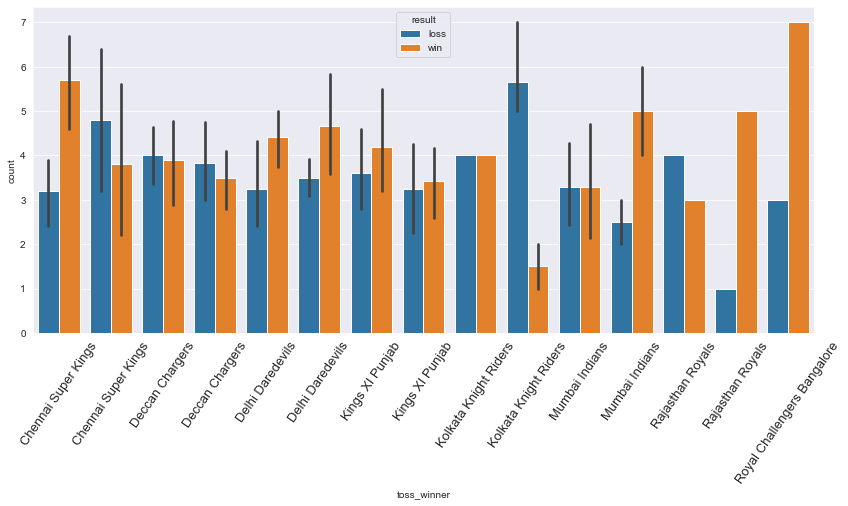

In [14]:
plot = sns.barplot(x="toss_winner",y="count",hue="result",data=toss_result)
plot.set_xticklabels(toss_result["toss_winner"],fontsize=13, rotation=55)

In [15]:
toss_result.head()

,season,toss_winner,result,count
0,2008,Chennai Super Kings,loss,2
1,2008,Chennai Super Kings,win,3
2,2008,Deccan Chargers,loss,7
3,2008,Deccan Chargers,win,2
4,2008,Delhi Daredevils,loss,4


### Matches won/lost by teams winning toss from year 2008 - 19

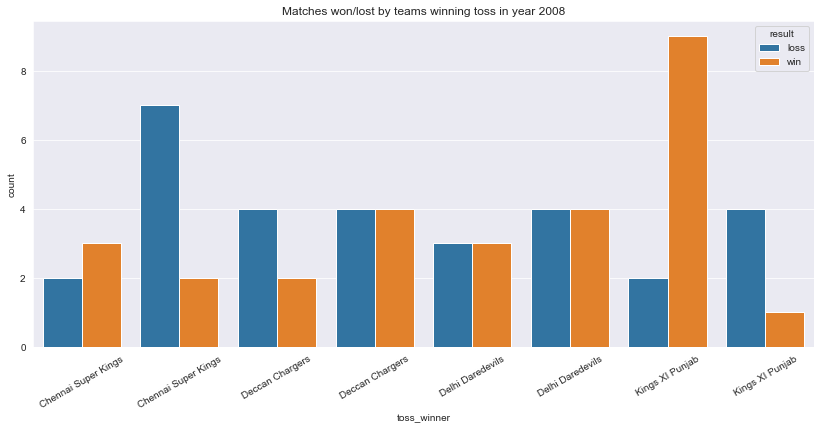

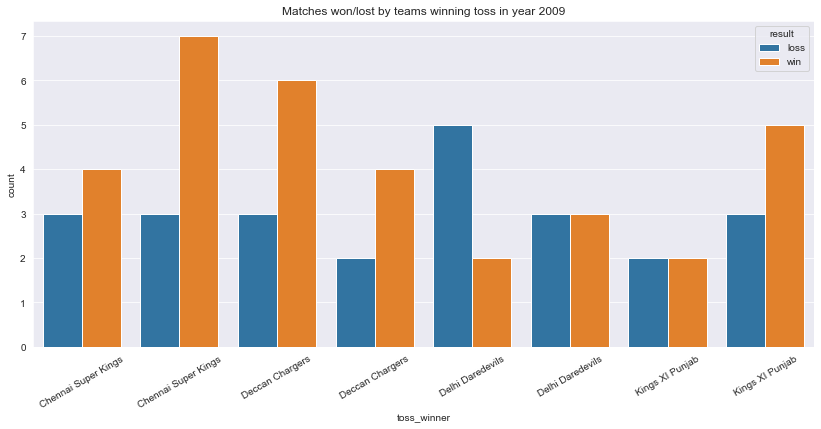

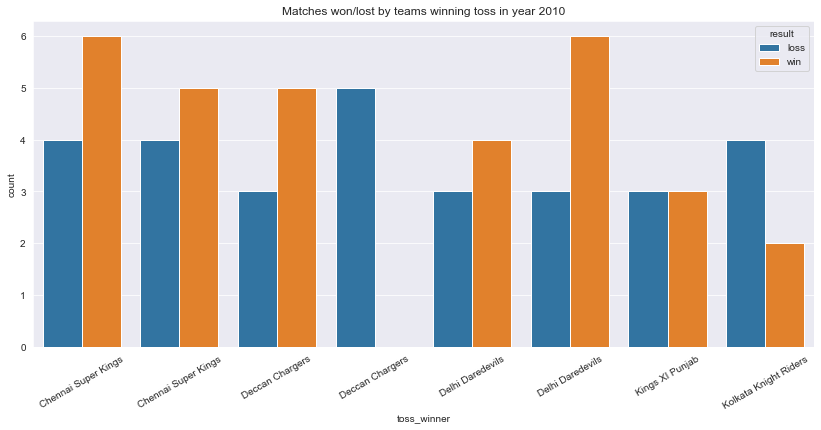

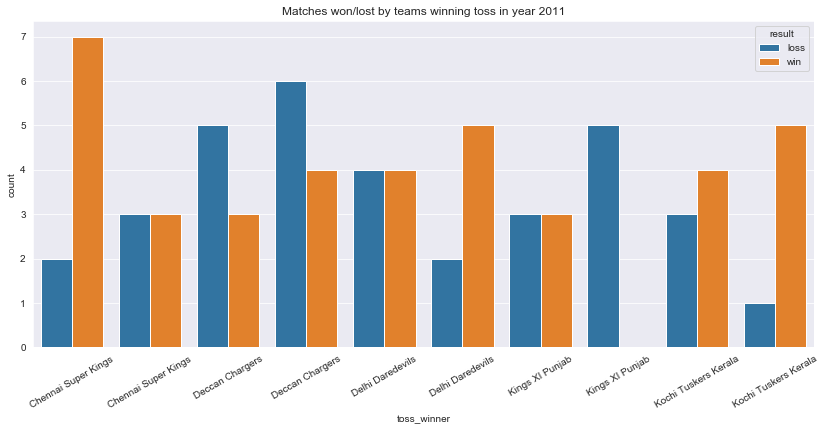

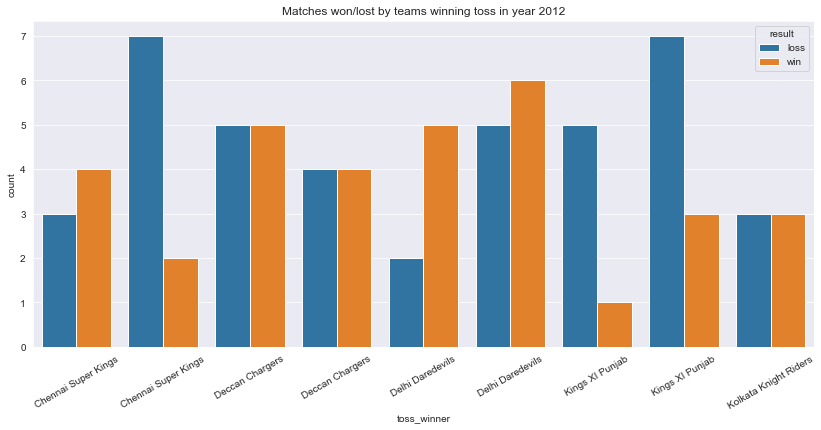

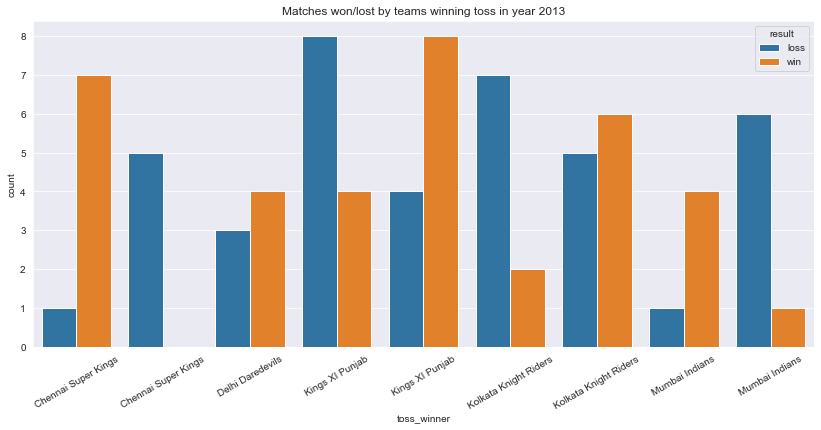

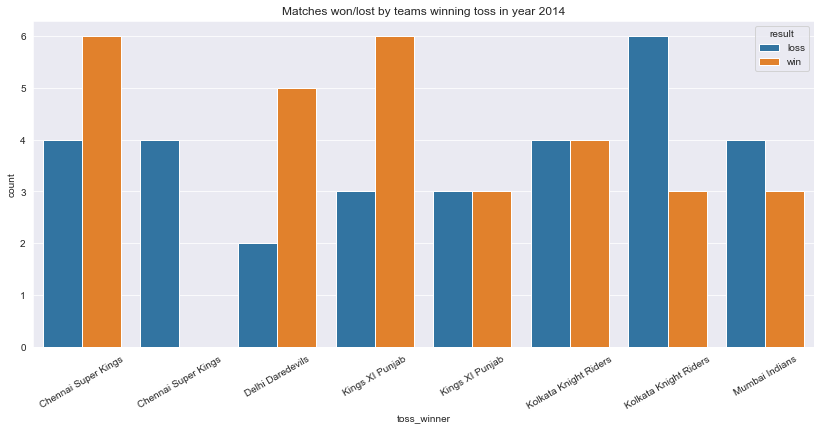

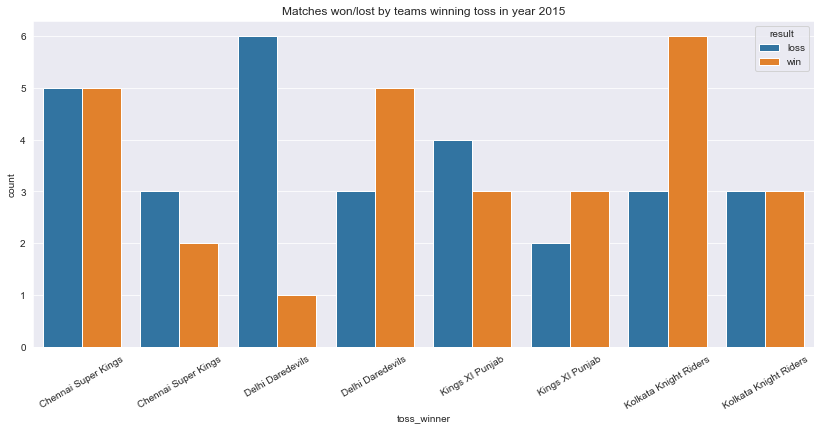

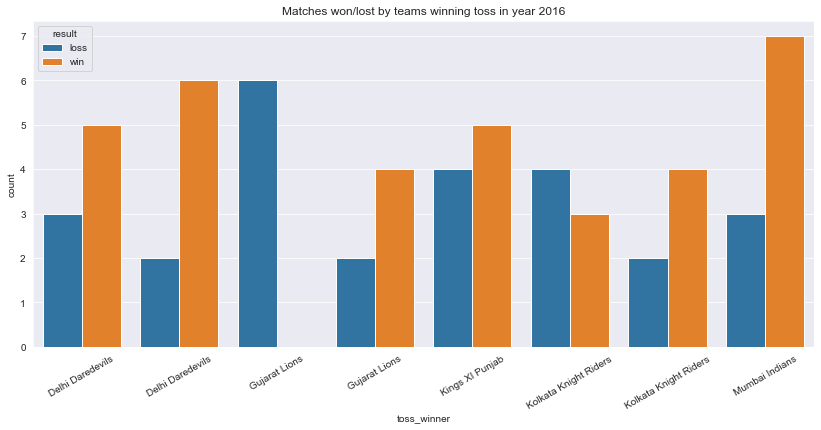

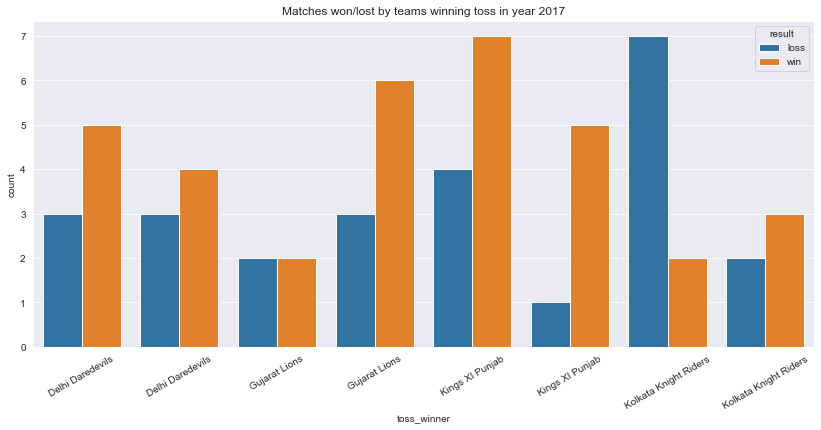

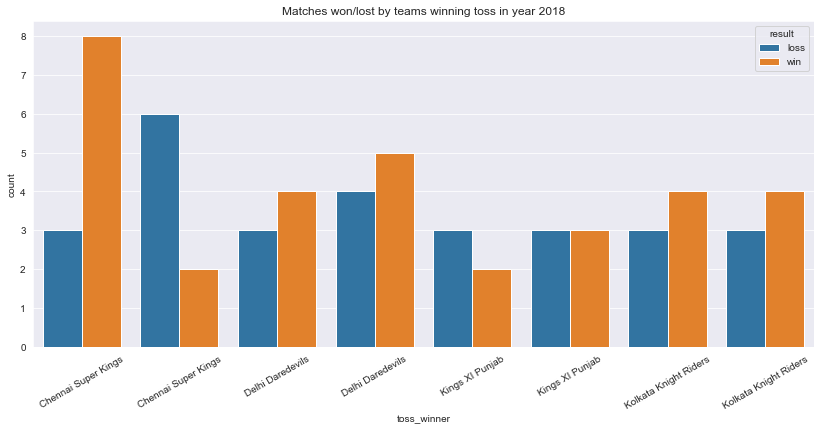

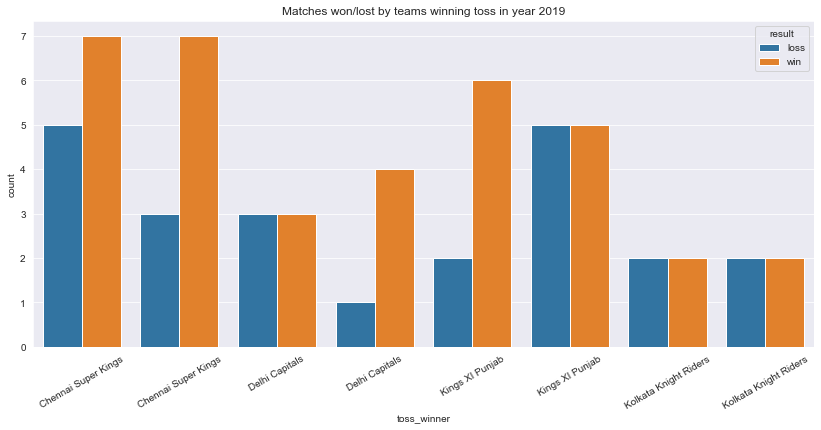

In [16]:
for i in range(2008,2020,1):
    toss_result_i = toss_result[toss_result['season']==i]
    plot = sns.barplot(x='toss_winner', y = 'count',hue='result',data=toss_result_i)
    plot.set_xticklabels(toss_result_i['toss_winner'],rotation=30)
    plot.set_title('Matches won/lost by teams winning toss in year '+str(i))
    plt.show()

## Venue effect on actual winners

In [17]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [18]:
venue_df = matches.groupby(['id','season','city','winner','venue'])

[Text(0, 0, 'Eden Gardens'),
 Text(0, 0, 'Wankhede Stadium'),
 Text(0, 0, 'M Chinnaswamy Stadium'),
 Text(0, 0, 'Feroz Shah Kotla'),
 Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
 Text(0, 0, 'MA Chidambaram Stadium, Chepauk'),
 Text(0, 0, 'Sawai Mansingh Stadium'),
 Text(0, 0, 'Punjab Cricket Association Stadium, Mohali'),
 Text(0, 0, 'Maharashtra Cricket Association Stadium'),
 Text(0, 0, 'Subrata Roy Sahara Stadium'),
 Text(0, 0, 'Dr DY Patil Sports Academy'),
 Text(0, 0, 'Kingsmead'),
 Text(0, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
 Text(0, 0, 'Sardar Patel Stadium, Motera'),
 Text(0, 0, 'SuperSport Park'),
 Text(0, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
 Text(0, 0, 'Brabourne Stadium'),
 Text(0, 0, 'Saurashtra Cricket Association Stadium'),
 Text(0, 0, 'Holkar Cricket Stadium'),
 Text(0, 0, 'Himachal Pradesh Cricket Association Stadium'),
 Text(0, 0, 'M. A. Chidambaram Stadium'),
 Text(0, 0, 'Rajiv Gandhi Intl. Cricket Stadium'),

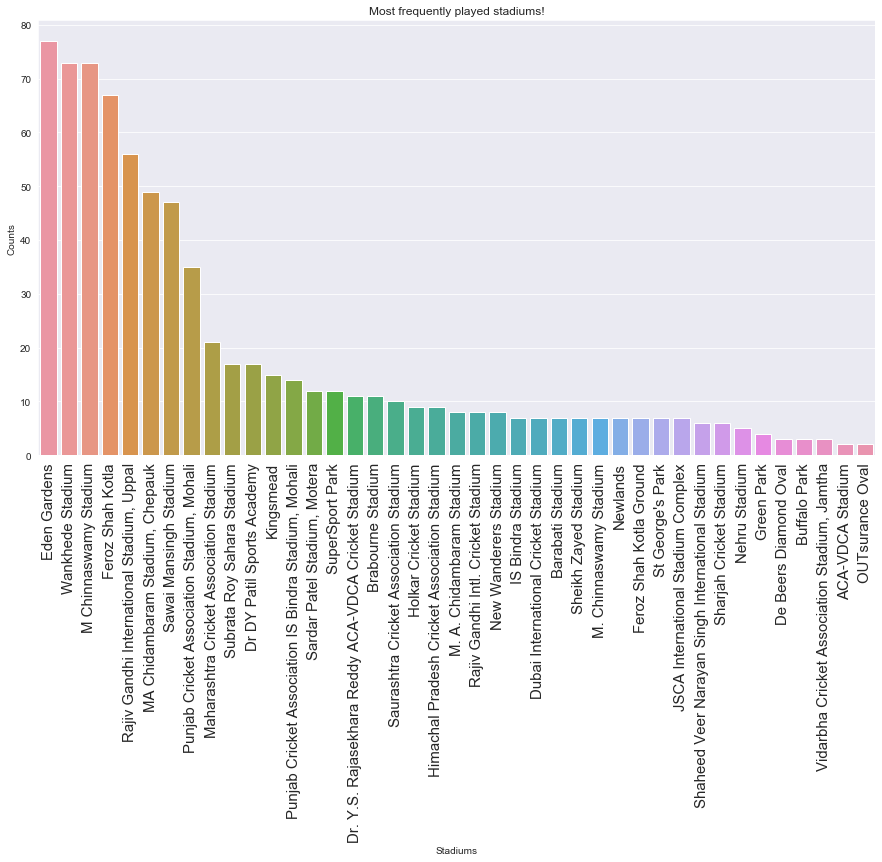

In [19]:
plt.figure(figsize=(15,8))
ven = matches['venue'].value_counts()
temp = sns.barplot(x = ven.index, y=ven.values)
plt.xlabel('Stadiums')
plt.ylabel('Counts')
plt.title('Most frequently played stadiums!')
temp.set_xticklabels(rotation=90, labels = ven.index, fontsize=15)

### Let's find the winning and loss probabilty of few well-known stadiums

Text(0.5, 1.0, 'Eden Gardens')

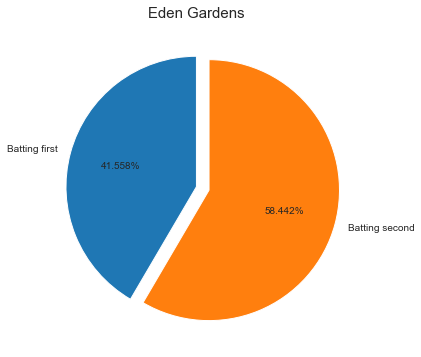

In [20]:
eden_stadium = matches[matches['venue']=='Eden Gardens']
wins_runs = eden_stadium[eden_stadium['win_by_runs']>0]
slices = [len(wins_runs), len(eden_stadium)-len(wins_runs)]
labels = ['Batting first', 'Batting second']
plt.pie(slices,labels=labels,explode=(0,0.1), startangle=90,autopct="%2.3f%%")
plt.title('Eden Gardens',fontsize=15)

Text(0.5, 1.0, 'Wankhede Stadium')

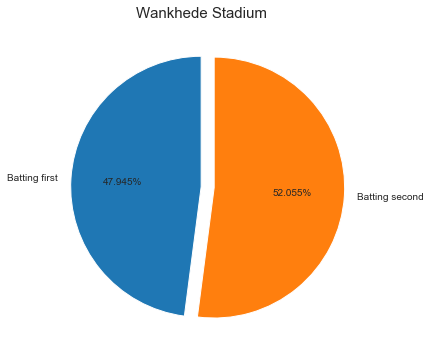

In [21]:
wankhede_stadium = matches[matches['venue']=='Wankhede Stadium']
wins_runs = wankhede_stadium[wankhede_stadium['win_by_runs']>0]
slices = [len(wins_runs), len(wankhede_stadium)-len(wins_runs)]
labels = ['Batting first', 'Batting second']
plt.pie(slices,labels=labels,explode=(0,0.1), startangle=90,autopct="%2.3f%%")
plt.title('Wankhede Stadium',fontsize=15)

Text(0.5, 1.0, 'MA Chidambaram Stadium, Chepauk')

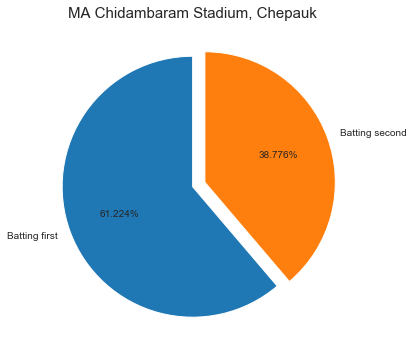

In [22]:
chidambarm_stadium = matches[matches['venue']=='MA Chidambaram Stadium, Chepauk']
wins_runs = chidambarm_stadium[chidambarm_stadium['win_by_runs']>0]
slices = [len(wins_runs), len(chidambarm_stadium)-len(wins_runs)]
labels = ['Batting first', 'Batting second']
plt.pie(slices,labels=labels,explode=(0,0.1), startangle=90,autopct="%2.3f%%")
plt.title('MA Chidambaram Stadium, Chepauk',fontsize=15)

### Companies should endorse Mumbai Indians and Chennai Super Kings among all teams.
### Players such as Virat Kohli, SK Raina, RG Sharma should be endorsed.